<class 'pandas.core.frame.DataFrame'>
Int64Index: 95 entries, 0 to 99
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sepal_length_cm  95 non-null     float64
 1   sepal_width_cm   95 non-null     float64
 2   petal_length_cm  95 non-null     float64
 3   petal_width_cm   95 non-null     float64
 4   class            95 non-null     object 
dtypes: float64(4), object(1)
memory usage: 4.5+ KB
1 . Loss: 0.531725538720696 , W: [-0.04606504  0.2012122  -0.29541011 -0.29593011 -0.02944796]
2 . Loss: 0.33372736198659575 , W: [-0.06939279  0.33400006 -0.49477605 -0.49581866 -0.05149385]
3 . Loss: 0.23799901036859983 , W: [-0.08162452  0.42963296 -0.64094458 -0.64245516 -0.06900216]
4 . Loss: 0.18378981001000563 , W: [-0.08813392  0.50331121 -0.75520862 -0.75711401 -0.08346422]
5 . Loss: 0.14939762931973405 , W: [-0.09147572  0.56279847 -0.84864266 -0.85087562 -0.09574121]
6 . Loss: 0.12578040452685943 , W: [-0.09

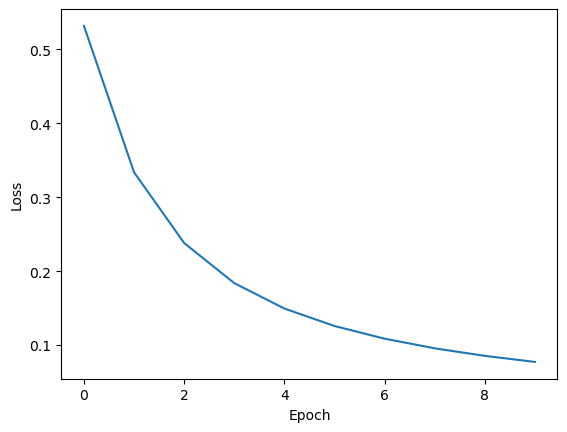

array([-0.09099016,  0.75399828, -1.15800266, -1.16119943, -0.13839762])

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('iris-data.csv')
df = df.dropna()
df.info()

df['class'].replace(["Iris-setosa", "Iris-versicolor"], [1, 0], inplace=True)

inp_df = df.drop(df.columns[[4]], axis=1)
out_df = df.drop(df.columns[[0, 1, 2, 3]], axis=1)

scaler = StandardScaler()
inp_df = scaler.fit_transform(inp_df)

new_c = (np.zeros(shape=(inp_df.shape[0], 1)) + 1)
inp_df = np.concatenate((inp_df, new_c), axis=1)

X_train, X_test, y_train, y_test = train_test_split(inp_df, out_df, test_size=0.2, random_state=42)

def model(X, W):
    # Logistic regression model implementation
    z = np.dot(X, W)
    y = 1 / (1 + np.exp(-z))
    return y

def loss_bce(y_true, y_pred):
    
    loss = -np.sum(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred)).mean()
    return loss

def fit(num_weights, epoch=10, lr=0.01):
    # Initialization
    W = np.zeros(num_weights)
    loss_history = []
    # Epochs start
    for e in range(1, epoch + 1):
        total_loss = 0.0


        for i in range(X_train.shape[0]):
            X_i = X_train[i]
            y_i = y_train.iloc[i]


            y_pred = model(X_i, W)
            loss = loss_bce(y_i, y_pred)
            total_loss += loss

            for j in range(W.shape[0]):
                # Calculate derivative against parameters
                dw_j = (y_pred - y_i) * X_i[j]
                # Update parameters
                W[j] = W[j] - lr * dw_j


        avg_loss = total_loss / X_train.shape[0]
        print(e, ". Loss:", avg_loss, ", W:", W)
        loss_history.append(avg_loss)
    plt.plot(loss_history)
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.show()

    return W

fit(X_train.shape[1], epoch=10, lr=0.01)


In [6]:
X_train[1]

array([ 0.14025935,  0.65973115, -0.85464475, -1.10111477,  1.        ])